What is an Outlier?
A data point which is significantly far from other data points.
Inter-quartile Range(IQR)
Lower Boundary = Q1-1.5*IQR
Upper Boundary = Q3+1.5*IQR
plot using Boxplot

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Abiral\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



     --------------------------------------- 10.7/10.7 MB 16.0 MB/s eta 0:00:00
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


In [5]:
df = pd.read_csv('mergedall.csv')

In [7]:
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3408 non-null   float64
 1   Address    3408 non-null   object 
 2   Floor      3153 non-null   object 
 3   Bathroom   3077 non-null   object 
 4   Bedroom    3071 non-null   object 
 5   Land       3244 non-null   object 
 6   Road       3244 non-null   float64
 7   Land Mark  1196 non-null   object 
dtypes: float64(2), object(6)
memory usage: 213.1+ KB


In [4]:
df.shape

(2710, 9)

In [5]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

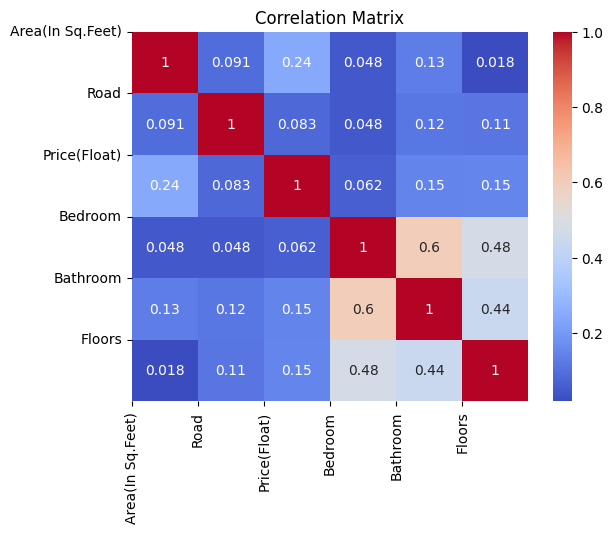

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set plot properties
plt.title('Correlation Matrix')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Display the plot
plt.show()


Boxplot

In [5]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
    

In [6]:
plot_boxplot(df,"Area(In Sq.Feet)")
plot_boxplot(df,"Price(Float)")
plot_boxplot(df,"Bedroom")
plot_boxplot(df,"Bathroom")
plot_boxplot(df,"Road")
plot_boxplot(df,"Floors")





NameError: name 'df' is not defined

In [9]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    ls = df.index[(df[ft]<lower_bound)| (df[ft]>upper_bound)]
    
    return ls
    

In [10]:
index_list = []
for feature in ['Price(Float)','Area(In Sq.Feet)','Bedroom','Bathroom','Road','Floors']:
    index_list.extend(outliers(df,feature))

In [11]:
len(index_list)

1195

In [12]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [4]:
df_cleaned = remove(df,index_list)

NameError: name 'remove' is not defined

In [14]:
df_cleaned.shape

(1907, 9)

In [3]:
plot_boxplot(df_cleaned,'Price(Float)')
plot_boxplot(df_cleaned,'Area(In Sq.Feet)')
plot_boxplot(df_cleaned,'Bedroom')
plot_boxplot(df_cleaned,'Bathroom')
plot_boxplot(df_cleaned,'Road')
plot_boxplot(df_cleaned,'Floors')

NameError: name 'plot_boxplot' is not defined

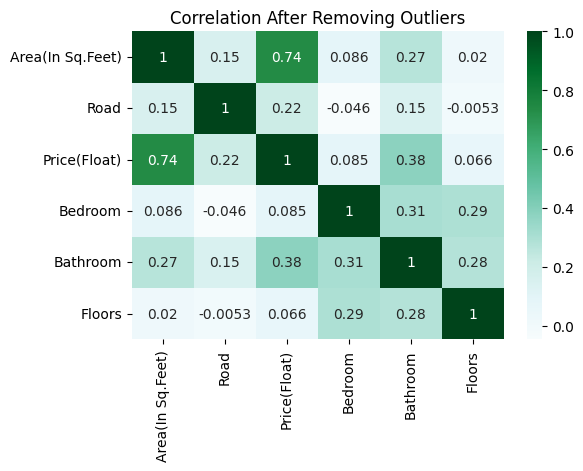

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame

# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='BuGn')
plt.title('Correlation After Removing Outliers')
plt.show()

In [2]:
df_cleaned.shape

NameError: name 'df_cleaned' is not defined

In [1]:
df_cleaned['Face'].unique()

NameError: name 'df_cleaned' is not defined

In [118]:
df_cleaned.head()

,Address,Area,Road,Price,Bedroom,Bathroom,Face,Floors,City,lat,lng
0,Dhalmal,1200.00000,12.0,5000000,7,3.0,South West,2.5,Kathmandu,27.69329,85.32227
1,Baneshwor,2806.45000,20.0,7000000,6,3.0,North,2.5,Kathmandu,27.69650,85.33980
2,Lagankhel,1197.87000,20.0,8000000,3,3.0,North,3.0,Lalitpur,27.66688,85.32290
3,Jagdol,1095.20000,13.0,9000000,5,1.0,East,2.0,Kathmandu,27.74588,85.37788
4,Thapathali,2181.84375,10.0,9000000,6,3.0,East,3.0,Kathmandu,27.69002,85.31837


In [138]:
len(df_cleaned['Face'].unique())

8

In [136]:
df_cleaned['Face'].describe()

count     1810
unique       9
top       East
freq       565
Name: Face, dtype: object

In [137]:

df_cleaned['Face']=df_cleaned['Face'].replace('South west','South West')
df_cleaned['Face']=df_cleaned['Face'].replace('south east','South East')
df_cleaned['Face']=df_cleaned['Face'].replace('east','East')
df_cleaned['Face']=df_cleaned['Face'].replace('west','West')
df_cleaned['Face']=df_cleaned['Face'].replace('south','South')
df_cleaned['Face']=df_cleaned['Face'].replace('north east east','North East')
df_cleaned['Face']=df_cleaned['Face'].replace('North west','North West')
df_cleaned['Face']=df_cleaned['Face'].replace('North east','North East')
df_cleaned['Face']=df_cleaned['Face'].replace('South east','South East')
df_cleaned['Face']=df_cleaned['Face'].replace('South west','South West')
df_cleaned['Face']=df_cleaned['Face'].replace('City','East')

















UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U16'), dtype('float64')) -> None

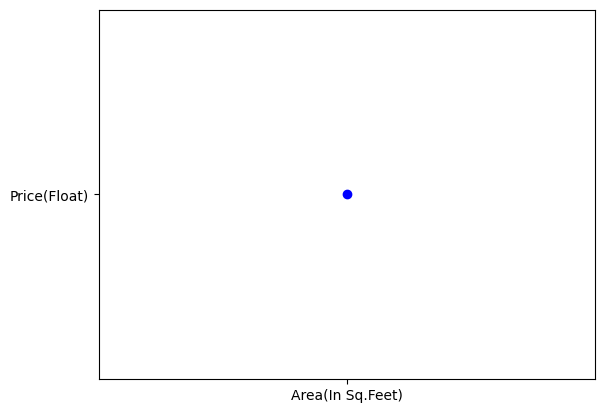

In [49]:
x="Area(In Sq.Feet)"
y="Price(Float)"
plt.scatter(x, y, color='blue', label='Data Points')

# Calculating the regression line
m, b = np.polyfit(x, y, 1)  # Fit a linear regression line
regression_line = m * x + b

# Plotting the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line Plot')

# Add legend
plt.legend()

# Display the plot
plt.show()

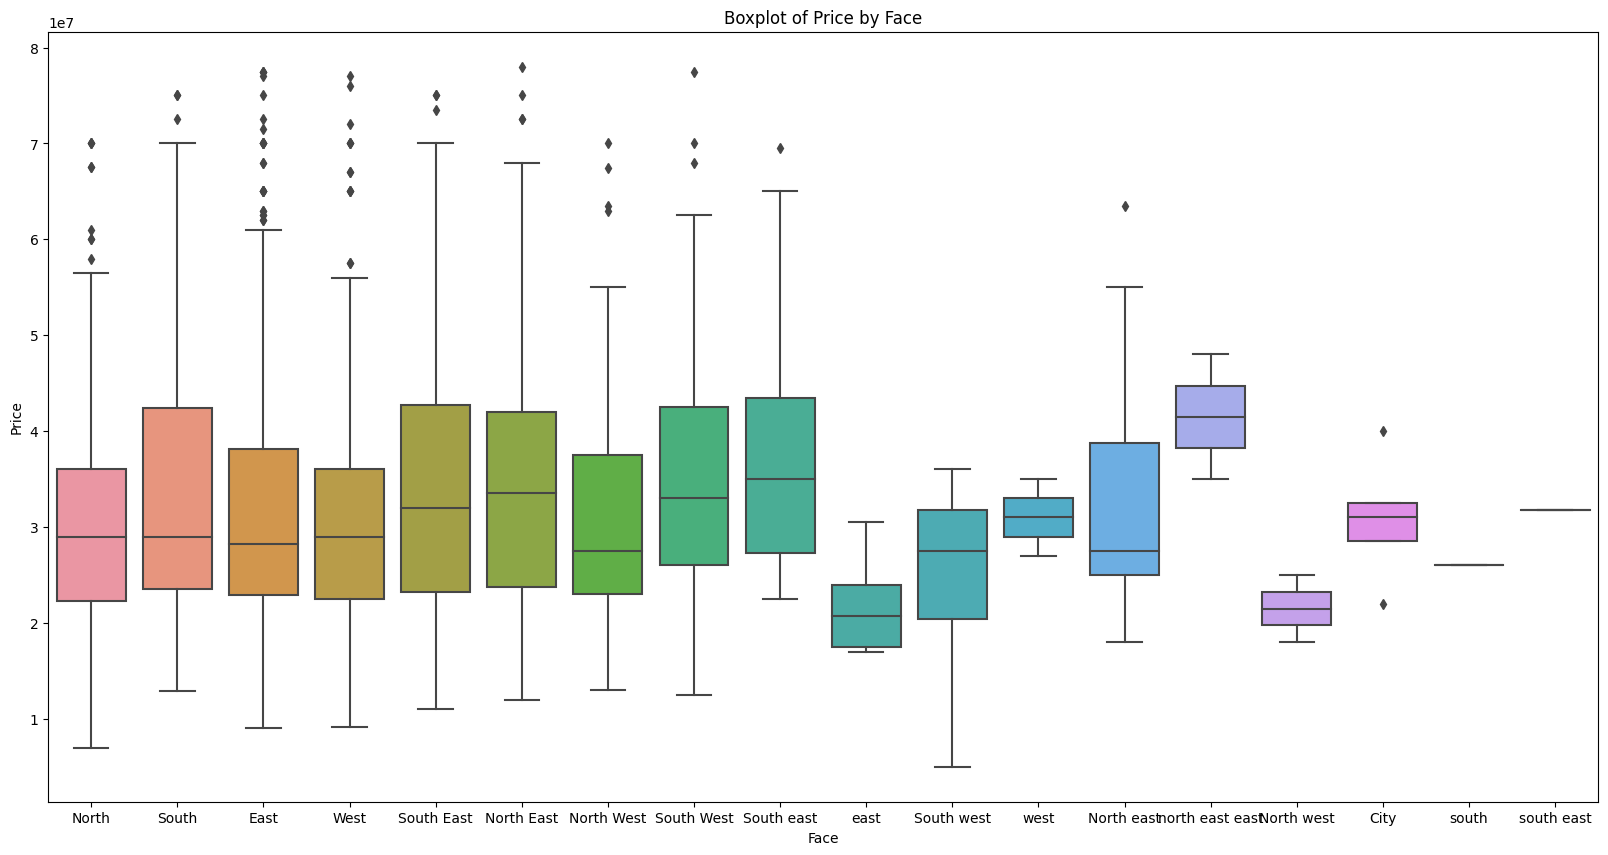

KeyError: 'Price'

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


# Boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Face', y='Price(Float)', data=df_cleaned)
plt.xlabel('Face')
plt.ylabel('Price')
plt.title('Boxplot of Price by Face')
plt.show()

# Correlation map
correlation = df_cleaned.groupby('Face')['Price(Float)'].mean().reset_index().pivot(columns='Face', values='Price')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()


In [20]:
pip install _tkagg


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '_tkagg'


In [22]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
Label_encoder = LabelEncoder()
nominal_cols = ['Face','Address','City']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(drop='first'),nominal_cols)],remainder='passthrough')

X_encoded = transformer.fit_transform(df_cleaned)
X = X_encoded.values
# Assuming you have your data stored in a numpy array called 'X'
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative explained variance
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

AttributeError: values not found

In [73]:
len(df_cleaned['Address'].unique())

386

In [142]:
df_cleaned.describe()

,Area,Road,Price,Bedroom,Bathroom,Floors,lat,lng
count,1810.000000,1810.000000,1.810000e+03,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000
mean,1538.766880,14.366950,3.228744e+07,5.101657,3.894475,2.692265,27.729124,84.693812
std,544.636789,3.033486,1.285668e+07,1.356208,1.137905,0.385683,2.195839,10.381954
min,85.562500,9.000000,5.000000e+06,1.000000,1.000000,2.000000,-37.835720,-117.914660
25%,1112.310000,13.000000,2.300000e+07,4.000000,3.000000,2.500000,27.658360,85.305120
50%,1369.000000,13.000000,2.950000e+07,5.000000,4.000000,2.500000,27.700870,85.334340
75%,1754.031250,16.000000,3.850000e+07,6.000000,5.000000,3.000000,27.736900,85.350723
max,3165.812500,20.500000,7.800000e+07,9.000000,8.000000,3.500000,64.179420,144.959850


In [23]:
df_cleaned = pd.read_csv("dataset_without_outliers.csv")

In [4]:
df_cleaned.shape

(1810, 9)

In [38]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


# Split the data into features (X) and target (y)
X = df.drop(columns=['Price(Float)'])
y = df['Price(Float)']

Label_encoder = LabelEncoder()
nominal_cols = ['Face','Address','City']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(drop='first'),nominal_cols)],remainder='passthrough')

X_encoded = transformer.fit_transform(X)
# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
 
# fit the regressor with x and y data
model = regressor.fit(X_encoded, y)

y_pred = model.predict(X_test)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'y_true' is the true target values and 'y_pred' is the predicted target values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 3245849937998562.0
Root Mean Squared Error (RMSE): 56972361.17626302
Mean Absolute Error (MAE): 6233362.594024597
R-squared (R2): 0.8281546831234726


0       27.69329
1       27.69650
2       27.66688
3       27.74588
4       27.69002
          ...   
1805    27.79072
1806    27.69329
1807    27.69134
1808    27.54370
1809    27.64917
Name: lat, Length: 1810, dtype: float64

In [39]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


# Split the data into features (X) and target (y)
X = df_cleaned.drop(columns=['Price'])
y = df_cleaned['Price']

Label_encoder = LabelEncoder()
nominal_cols = ['Face','Address','City']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(drop='first'),nominal_cols)],remainder='passthrough')

X_encoded = transformer.fit_transform(X)
# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

regressor = RandomForestRegressor(n_estimators=900, random_state=0)
 
# fit the regressor with x and y data
model = regressor.fit(X_encoded, y)

y_pred = model.predict(X_test)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'y_true' is the true target values and 'y_pred' is the predicted target values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 10251137302999.146
Root Mean Squared Error (RMSE): 3201739.7306775493
Mean Absolute Error (MAE): 2242571.3375929096
R-squared (R2): 0.931542871092128


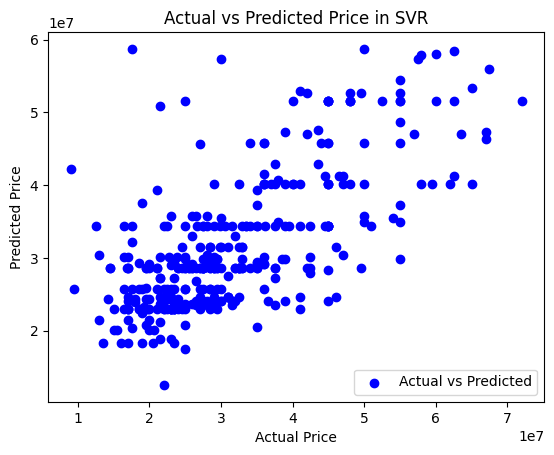

In [56]:
import matplotlib.pyplot as plt

# Assuming 'y_test' is the true target values and 'y_pred' is the predicted target values

# Plotting
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Add labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price in SVR')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Creating and training the gradient boost model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Assuming 'y_true' is the true target values and 'y_pred' is the predicted target values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error: 68942670621285.81
Mean Squared Error (MSE): 68942670621285.81
Root Mean Squared Error (RMSE): 8303172.322750252
Mean Absolute Error (MAE): 6131369.403252926
R-squared (R2): 0.5396006169390085


In [148]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Create the XGBoost regression model
xgb_reg = xgb.XGBRegressor()

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

RMSE: 8556538.2116645
Mean Squared Error (MSE): 73214346167674.7
Root Mean Squared Error (RMSE): 8556538.2116645
Mean Absolute Error (MAE): 6149780.289693593
R-squared (R2): 0.5859721454972306


In [55]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


svm_reg = SVR(kernel='linear')

# Train the model
svm_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_reg.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

RMSE: 8883848.738094429
Mean Squared Error (MSE): 78922768401341.98
Root Mean Squared Error (RMSE): 8883848.738094429
Mean Absolute Error (MAE): 6426322.370059917
R-squared (R2): 0.47295349086426675


In [74]:
df_cleaned.to_csv('NoOutliersDataSet.csv',index = False)

In [8]:
df_cleaned.min()

Address     Aakasedhara
Area            85.5625
Road                9.0
Price           5000000
Bedroom               1
Bathroom            1.0
Face               East
Floors              2.0
City          Bhaktapur
lat            22.57161
lng          -117.91466
dtype: object

In [13]:
len(df_cleaned['Address'].unique())

296

In [143]:
df_cleaned = df_cleaned[df_cleaned['Address'] != 'Greenland']
df_cleaned = df_cleaned[df_cleaned['Address'] != 'Bhaktapur']
df_cleaned = df_cleaned[df_cleaned['Address'] != 'Kathmandu']
df_cleaned = df_cleaned[~df_cleaned['Address'].str.contains('Colony')]
df_cleaned = df_cleaned[~df_cleaned['Address'].str.contains('Park')]




In [149]:
df_cleaned.shape

(1795, 11)

In [37]:
import requests
import json


for i,row in df_cleaned.iterrows():
    apiAddress = str(df_cleaned.at[i,'Address']+","+df_cleaned.at[i,'City'])
    parameters = {
        "key":"Fw0kwhS7IqLj7P04ijxhbFRGWBtftbgG",
        "location":apiAddress
    }
    responses = requests.get("https://www.mapquestapi.com/geocoding/v1/address",params = parameters)
    data =json.loads(responses.text)['results']
    lat = data[0]['locations'][0]['latLng']['lat']
    lng = data[0]['locations'][0]['latLng']['lng']
    df_cleaned.at[i,'lat'] = lat
    df_cleaned.at[i,'lng'] = lng

237

In [4]:
df_cleaned.to_csv('DatasetwithLatLng.csv',index=False)

NameError: name 'df_cleaned' is not defined

In [5]:
df_cleaned = pd.read_csv('DatasetwithLatLng.csv')

In [3]:
pip install googlemaps



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40717 sha256=b54b89dacd5f73bdcaf469633fc0719e9d49f453d403328e967932b96c7d3d62
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\d9\5f\46\54a2bdb4bcb07d3faba4463d2884865705914cc72a7b8bb5f0
Successfully built googlemaps


In [4]:
import os

In [5]:
api_key = os.environ['APIKEY']

KeyError: 'APIKEY'